<a href="https://colab.research.google.com/github/Leila828/instadeep_labs/blob/master/old500da_detection_%20using_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model


In [ ]:

from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

In [ ]:
img_width, img_height = 224, 224

In [ ]:

base_model=ResNet50(weights='imagenet',include_top=False, input_shape=(img_width, img_height, 3))

In [ ]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
last_layer = base_model.get_layer('conv5_block3_out')
print(last_layer.output_shape)

(None, 7, 7, 2048)


In [ ]:
x = Flatten()(last_layer.output)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation = 'relu')(x)
x = Dense(1, activation = 'sigmoid')(x)
model = Model(base_model.input, x)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
import tensorflow as tf

In [ ]:
optimizer = Adam(lr=1e-6)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/My Drive/data

/content/drive/My Drive/data


In [ ]:
cd dt500DA/dt500DA/

/content/drive/My Drive/data/dt500DA/dt500DA


In [ ]:
train_datagen=ImageDataGenerator(horizontal_flip=True,
                              vertical_flip=True,
                              validation_split=0.2,
                              preprocessing_function = preprocess_input) # incluído nas dependências

validation_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

In [ ]:
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (img_width, img_height),
                                                 
                                                 batch_size = 20,
                                                 class_mode = 'binary',
                                                )

validation_set = validation_datagen.flow_from_directory('val',
                                                        target_size = (img_width, img_height),
                                                        
                                                        batch_size = 20,
                                                        class_mode = 'binary',
                                                        )

Found 500 images belonging to 2 classes.
Found 110 images belonging to 2 classes.


In [ ]:
history = model.fit(training_set,
                    steps_per_epoch=7,
                    epochs = 100,
                    validation_data = validation_set,
                    validation_steps = 6)

Epoch 1/100
7/7 [==============================] - 11s 1s/step - loss: 1.2240 - accuracy: 0.4143 - val_loss: 0.8080 - val_accuracy: 0.5545
Epoch 2/100
7/7 [==============================] - 7s 1s/step - loss: 0.9782 - accuracy: 0.5571 - val_loss: 0.7661 - val_accuracy: 0.5636
Epoch 3/100
7/7 [==============================] - 7s 1s/step - loss: 0.9437 - accuracy: 0.5571 - val_loss: 0.6942 - val_accuracy: 0.6000
Epoch 4/100
7/7 [==============================] - 7s 1000ms/step - loss: 0.7049 - accuracy: 0.6857 - val_loss: 0.6426 - val_accuracy: 0.6545
Epoch 5/100
7/7 [==============================] - 7s 937ms/step - loss: 0.8328 - accuracy: 0.6214 - val_loss: 0.6089 - val_accuracy: 0.7000
Epoch 6/100
7/7 [==============================] - 6s 982ms/step - loss: 0.7013 - accuracy: 0.6643 - val_loss: 0.5817 - val_accuracy: 0.7182
Epoch 7/100
7/7 [==============================] - 6s 970ms/step - loss: 0.6387 - accuracy: 0.7000 - val_loss: 0.5629 - val_accuracy: 0.7000
Epoch 8/100
7/7 [===

Text(0.5, 1.0, 'Training and validation loss')

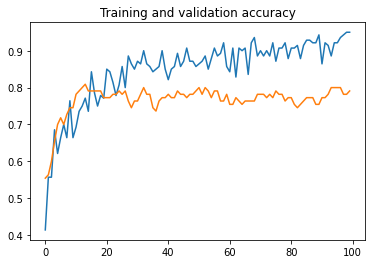

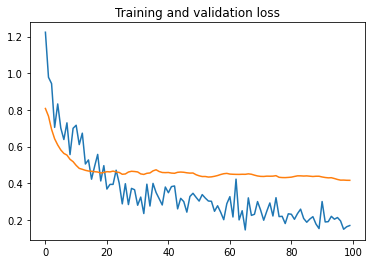

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )